In [1]:
import mlrose_hiive as mh

In [2]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [3]:
import pandas as pd

In [4]:
# # Flip Flop
problem_ffp = mh.FlipFlopGenerator().generate(seed=0, size=28)
#state = problem_ffp.get_state()

In [5]:
# GA runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GARunner(problem=problem_ffp,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[12, 13, 16, 18],
              mutation_rates=[0.1, 0.08, 0.2]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [75]:
df_run_curves_ffp.shape

(7155, 7)

In [76]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.002198,17.0,0.0,12,0.1,2048
1,1,0.007016,22.0,2.0,12,0.1,2048
2,2,0.015577,22.0,3.0,12,0.1,2048
3,3,0.020061,22.0,4.0,12,0.1,2048
4,4,0.021587,22.0,5.0,12,0.1,2048


In [77]:
df_run_curves_ffp['Fitness'].max()

26.0

In [78]:
# GA runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GARunner(problem=problem_ffp,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[16, 18],
              mutation_rates=[0.1, 0.2]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [79]:
df_run_curves_ffp.shape

(2531, 7)

In [80]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000601,17.0,0.0,16,0.1,2048
1,1,0.005894,22.0,2.0,16,0.1,2048
2,2,0.023081,22.0,3.0,16,0.1,2048
3,3,0.027630,22.0,4.0,16,0.1,2048
4,4,0.034385,22.0,5.0,16,0.1,2048


In [81]:
df_run_curves_ffp['Fitness'].max()

26.0

In [67]:
# need to check Time and FEvals

In [68]:
df_run_curves_ffp.dtypes

Iteration            int64
Time               float64
Fitness            float64
FEvals             float64
Population Size      int64
Mutation Rate      float64
max_iters            int64
dtype: object

In [69]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [70]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
493,493,2.094041,26.0,496.0,16,0.1,2048
494,494,2.096576,26.0,497.0,16,0.1,2048
495,495,2.098871,26.0,498.0,16,0.1,2048
496,496,2.103660,26.0,499.0,16,0.1,2048
497,497,2.107803,26.0,500.0,16,0.1,2048
...,...,...,...,...,...,...,...
989,989,4.664097,26.0,992.0,16,0.1,2048
990,990,4.669938,26.0,993.0,16,0.1,2048
991,991,4.678171,26.0,994.0,16,0.1,2048
992,992,4.690075,26.0,995.0,16,0.1,2048


In [71]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,16,0.1,496.0,743.0,2.094041


In [72]:
# tentatively, pick pop size = 16 and mutation_rate = 0.1, as this is the only choice.

In [73]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000477,17.0,0.0,16,0.1,2048
1,1,0.012407,22.0,2.0,16,0.1,2048
2,2,0.020353,22.0,3.0,16,0.1,2048
3,3,0.025653,22.0,4.0,16,0.1,2048
4,4,0.027462,22.0,5.0,16,0.1,2048


In [6]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [7]:
# GA runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GARunner(problem=problem_ffp,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[16], # 20 bits in total
              mutation_rates=[0.1])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [8]:
#df_iter_curves_ffp.to_csv("../../csv-files/df_iter_flipflop_28.csv")

In [42]:
df_iter_curves_ffp = pd.read_csv("../../csv-files/df_iter_flipflop_28.csv")

In [76]:
df_iter_curves_ffp.shape

(6706, 7)

In [77]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000977,17.0,0.0,16,0.1,2048
1,1,0.006520,22.0,2.0,16,0.1,2048
2,2,0.012654,22.0,3.0,16,0.1,2048
3,3,0.018074,22.0,4.0,16,0.1,2048
4,4,0.019761,22.0,5.0,16,0.1,2048


In [78]:
df_iter_curves_ffp.Iteration.max()

995

In [44]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [80]:
df_fitness_iter_ffp.shape

(996, 3)

In [81]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,14.0,5.333333
1,1,18.3,4.233333
2,2,18.6,3.822222
3,3,19.0,3.111111
4,4,19.6,2.711111


In [82]:
df_iter_curves_ffp.Fitness.max()

26.0

In [90]:
# convergence point
df_iter_curves_ffp[df_iter_curves_ffp.Fitness == df_iter_curves_ffp.Fitness.max()].Iteration

493    493
494    494
495    495
496    496
497    497
      ... 
704    704
705    705
706    706
707    707
708    708
Name: Iteration, Length: 1002, dtype: int64

In [91]:
# converge point-never converged
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

nan

In [45]:
# semi-converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()-1].Iteration.min()

539

In [92]:
df_fitness_iter_ffp.avg_fitness.max()

25.333333333333332

In [87]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [88]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,14.0,5.333333,2.309401
1,1,18.3,4.233333,2.057507
2,2,18.6,3.822222,1.955050
3,3,19.0,3.111111,1.763834
4,4,19.6,2.711111,1.646545


Text(0, 0.5, 'Fitness')

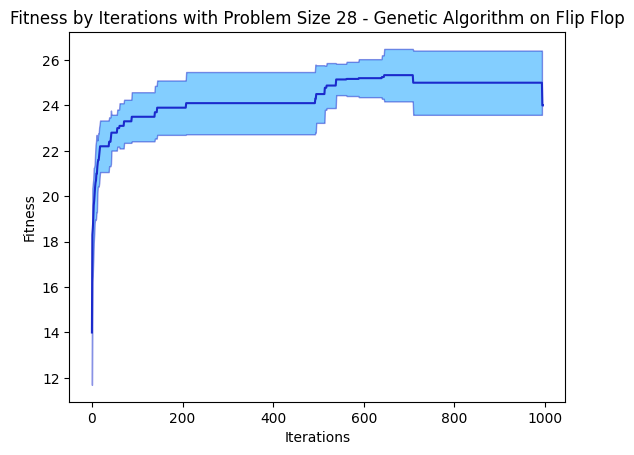

In [89]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#1B2ACC')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('Fitness by Iterations with Problem Size 28 - Genetic Algorithm on Flip Flop')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [40]:
# Fevals - iteration

In [9]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [10]:
df_FEvals_iter_ffp.shape

(996, 3)

In [12]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [13]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 2.1213203435596424)

In [14]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.0,0.000000,0.000000
1,1,1.8,0.177778,0.421637
2,2,3.0,0.444444,0.666667
3,3,4.3,0.455556,0.674949
4,4,5.7,1.122222,1.059350


In [47]:
df_FEvals_iter_ffp.Iteration.max()

995

In [10]:
df_FEvals_iter_ffp.avg_FEvals.max()

1001.0

In [11]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp['Iteration']==59].avg_FEvals

59    63.0
Name: avg_FEvals, dtype: float64

In [33]:
gab28_fevals = pd.read_csv('../../csv-files/df_FEvals_iter_ffp_28.csv')

In [34]:
gab28_fevals.shape

(60, 4)

In [35]:
gab28_fevals.head()

,Unnamed: 0,Iteration,avg_FEvals,var_FEvals
0,0,0,0.0,0.000000
1,1,1,1.8,0.177778
2,2,2,3.1,0.322222
3,3,3,4.5,0.500000
4,4,4,5.8,0.622222


In [36]:
compare_ga_gab_fevals = df_FEvals_iter_ffp[df_FEvals_iter_ffp['Iteration']<59]['avg_FEvals']\
                        - gab28_fevals['avg_FEvals']

In [37]:
compare_ga_gab_fevals[compare_ga_gab_fevals >= 0]

0    0.0
1    0.0
Name: avg_FEvals, dtype: float64

In [46]:
compare_ga_gab_fevals.max(), compare_ga_gab_fevals.min()

(0.0, -3.8555555555555543)

In [39]:
np.mean(compare_ga_gab_fevals)

-2.4134786117836953

In [40]:
(60 - 2) / 60

0.9666666666666667

Text(0, 0.5, 'FEvals')

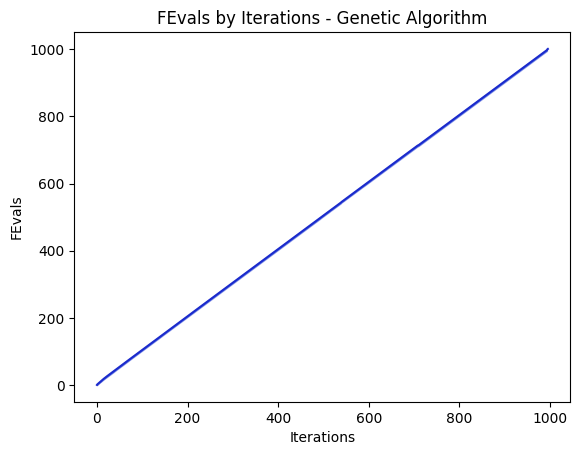

In [15]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#1B2ACC')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('FEvals by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [47]:
# fitness - wall clock time

In [12]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [13]:
df_time_iter_ffp.avg_time.max()

4.4259912814886775

In [18]:
df_time_iter_ffp.shape

(996, 3)

In [17]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.000357,2.581877e-08
1,1,0.005112,7.244658e-06
2,2,0.009712,2.396074e-05
3,3,0.014815,5.824661e-05
4,4,0.017154,7.288748e-05


In [18]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [20]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.000357,2.581877e-08,0.000161
1,1,0.005112,7.244658e-06,0.002692
2,2,0.009712,2.396074e-05,0.004895
3,3,0.014815,5.824661e-05,0.007632
4,4,0.017154,7.288748e-05,0.008537


In [14]:
df_time_iter_ffp[df_time_iter_ffp.Iteration == 59]

,Iteration,avg_time,var_time
59,59,0.143469,0.005953


In [49]:
df_time_iter_ffp[df_time_iter_ffp.Iteration == 539]

,Iteration,avg_time,var_time,stddev_time
539,539,1.508273,0.502188,0.708652


In [29]:
df_time_iter_ffp[df_time_iter_ffp.Iteration == 92]

,Iteration,avg_time,var_time,stddev_time
92,92,0.196427,0.004831,0.069503


Text(0, 0.5, 'Time')

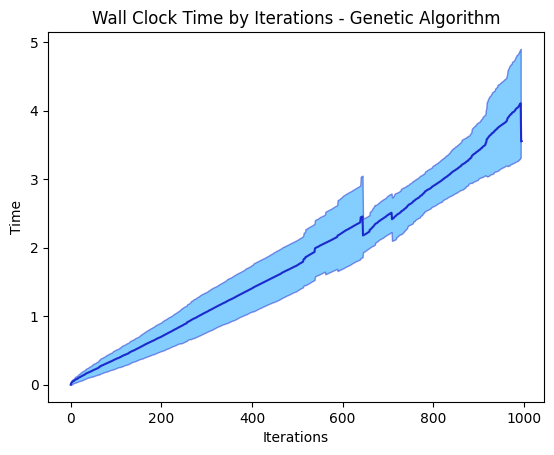

In [106]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#1B2ACC')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('Wall Clock Time by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [19]:
df_time_iter_ffp_59 = df_time_iter_ffp[df_time_iter_ffp.Iteration <= 59]

In [21]:
df_time_iter_ffp.stddev_time.max(), df_time_iter_ffp_59.stddev_time.max(),

(1.0141977386978667, 0.0771580658510986)

Text(0, 0.5, 'Time')

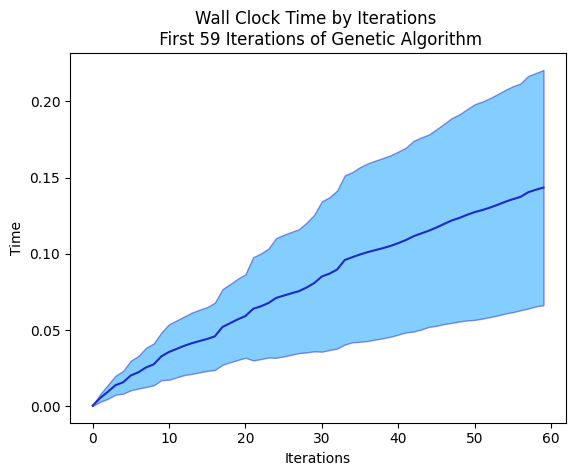

In [22]:
plt.plot(df_time_iter_ffp_59.Iteration, df_time_iter_ffp_59.avg_time, 'k', color='#1B2ACC')
plt.fill_between(df_time_iter_ffp_59.Iteration, df_time_iter_ffp_59.avg_time - df_time_iter_ffp_59.stddev_time\
                 , df_time_iter_ffp_59.avg_time + df_time_iter_ffp_59.stddev_time\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('Wall Clock Time by Iterations \n First 59 Iterations of Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [23]:
df_time_iter_ffp[df_time_iter_ffp.stddev_time==df_time_iter_ffp.stddev_time.max()].Iteration

734    734
Name: Iteration, dtype: int64

In [ ]:
# from 1000

In [24]:
df_time_iter_ffp.stddev_time.max()

1.0141977386978667

In [25]:
df_time_iter_ffp.avg_time.max()

4.4259912814886775

In [26]:
df_time_iter_ffp[df_time_iter_ffp['Iteration']<=59].avg_time.max()

0.1434690766967833

In [48]:
df_time_iter_ffp[df_time_iter_ffp['Iteration']<=59].stddev_time.max()

0.0771580658510986

In [27]:
df_time_iter_ffp_28 = pd.read_csv('../../csv-files/df_time_iter_ffp_28.csv')

In [28]:
comp_time = df_time_iter_ffp_28['avg_time'] - df_time_iter_ffp[df_time_iter_ffp['Iteration'] <= 59].avg_time

In [29]:
comp_time.max()

0.32919558029389007

In [31]:
comp_time.min(), comp_time.max(), len(comp_time[comp_time < 0])

(0.00024333129404107817, 0.32919558029389007, 0)

In [32]:
np.mean(comp_time)

0.09886968660279828